In [2]:
import cv2
import numpy as np
from scipy.stats import skew
import scipy.stats as stats
from scipy.stats import skew
import matplotlib.pyplot as plt



import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from IPython.display import display

from xgboost import XGBRegressor

import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression


import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [3]:
#Divede the train, validation and test dataset.
file_handler = open("../pairsDevTrain.txt", "r", encoding="utf-8")

# We must first put the data in a list
train_same = [];
train_diff= [];

for row in file_handler:
    # The values we read are strings, we must convert them to the correct type (float)
    temp=row.replace("\n", "");
    string= temp.split("\t") # split it by whitespace
    converted = [x for x in string]
    if len(converted) ==3:
        #train_same.append( [converted[0],converted[1],converted[0],converted[2] ]);
        train_same.append( converted );
    if len(converted) ==4:
        train_diff.append(converted);
file_handler.close()


file_handler = open("../pairsDevTest.txt", "r", encoding="utf-8")
# We must first put the data in a list
test_same = [];
test_diff= [];

for row in file_handler:
    temp=row.replace("\n", "");
    string= temp.split("\t") # split it by whitespace
    converted = [x for x in string]
    if len(converted) ==3:
        test_same.append( converted );
    if len(converted) ==4:
        test_diff.append(converted);
file_handler.close()

print("There are {} images in the train, {} in the test".format(len(train_same)+ len(train_diff), len(test_same)+ len(test_diff) ) );


vali_same= test_same[0: len(test_same)//2];
test_same= test_same[len(test_same)//2: ];

vali_diff= test_diff[0: len(test_diff)//2];  #notice: should be test_diff
test_diff= test_diff[len(test_diff)//2: ];

There are 2200 images in the train, 1000 in the test


In [7]:
import cv2
cascPath = "haarcascade_frontalface_default.xml"
# Create the haar cascade
faceCascade = cv2.CascadeClassifier(cascPath)

def faceDetectGS( imagePath):
    gray = cv2.imread(imagePath, 0);
    # Detect faces in the image
    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        #flags = cv2.cv.CV_HAAR_SCALE_IMAGE
    )
    
    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(gray, (x, y), (x+w, y+h), 255, 4)
    return gray

In [13]:
def faceDetectCo (imagePath):
    cascPath = "haarcascade_frontalface_default.xml"
    # Create the haar cascade
    faceCascade = cv2.CascadeClassifier(cascPath)

    # Read the image
    image = cv2.imread(imagePath, 1 ) #read a color figure
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Detect faces in the image
    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30)
    #flags = cv2.CV_HAAR_SCALE_IMAGE
    )

    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    return image


(250, 250, 3)


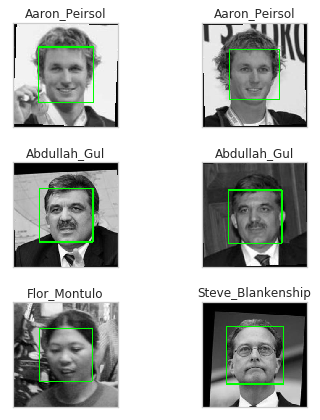

In [21]:
#faceDetect will detect the face and mark it with green box.
from face_detect_GS import faceDetectGS

def format_filename(name, number):
    num_zeros = "0"*(4 - len(number))
    filepath = "../lfw2/"+name+"/"+name+"_"+num_zeros+number+".jpg"
    return filepath

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure( figsize= [6,6]);
plt.subplot(3, 2, 1)
img=faceDetectCo(format_filename(train_same[0][0], train_same[0][1] )  )
imgplot = plt.imshow(img ,cmap='gray')
plt.title(train_same[0][0]);
plt.xticks([])
plt.yticks([])

plt.subplot(3, 2, 2)
img=faceDetectCo(format_filename(train_same[0][0], train_same[0][2] )  )
imgplot = plt.imshow(img,cmap='gray')
plt.title(train_same[0][0]);
plt.xticks([])
plt.yticks([])
print(img.shape)

plt.subplot(3, 2, 3)
img=faceDetectCo(format_filename(vali_same[0][0], vali_same[0][1] )  )
imgplot = plt.imshow(img,cmap='gray')
plt.title(vali_same[0][0]);
plt.xticks([])
plt.yticks([])

plt.subplot(3, 2, 4)
img=faceDetectCo(format_filename(vali_same[0][0], vali_same[0][2] )  )
imgplot = plt.imshow(img,cmap='gray')
plt.title(vali_same[0][0]);
plt.xticks([])
plt.yticks([])

plt.subplot(3, 2, 5)
img=faceDetectCo(format_filename(test_diff[0][0], test_diff[0][1] )  )
imgplot = plt.imshow(img,cmap='gray')
plt.title(test_diff[0][0]);
plt.xticks([])
plt.yticks([])

plt.subplot(3, 2, 6)
img=faceDetectCo(format_filename(test_diff[0][2], test_diff[0][3] )  )
imgplot = plt.imshow(img,cmap='gray')
plt.title(test_diff[0][2]);
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()